# Summary
This notebook generates images of Canadian regions with their internet speeds for every year and quarter and saves them in the images_for_gif folder.

In [34]:
import sys
sys.path.append('..')

In [35]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,8)
from src.datasets.loading import statcan, ookla

## Calculate Statistics

In [36]:
#Generate images

In [37]:
quarters = [1,2,3,4]
years = [2019, 2020, 2021, 2022]
save_dir = 'images_for_gif'

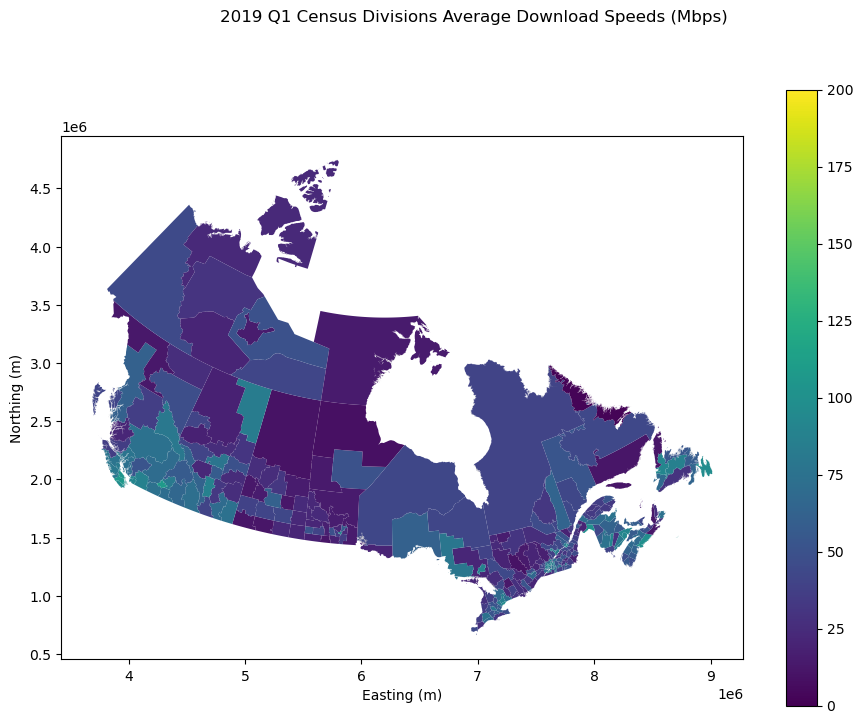

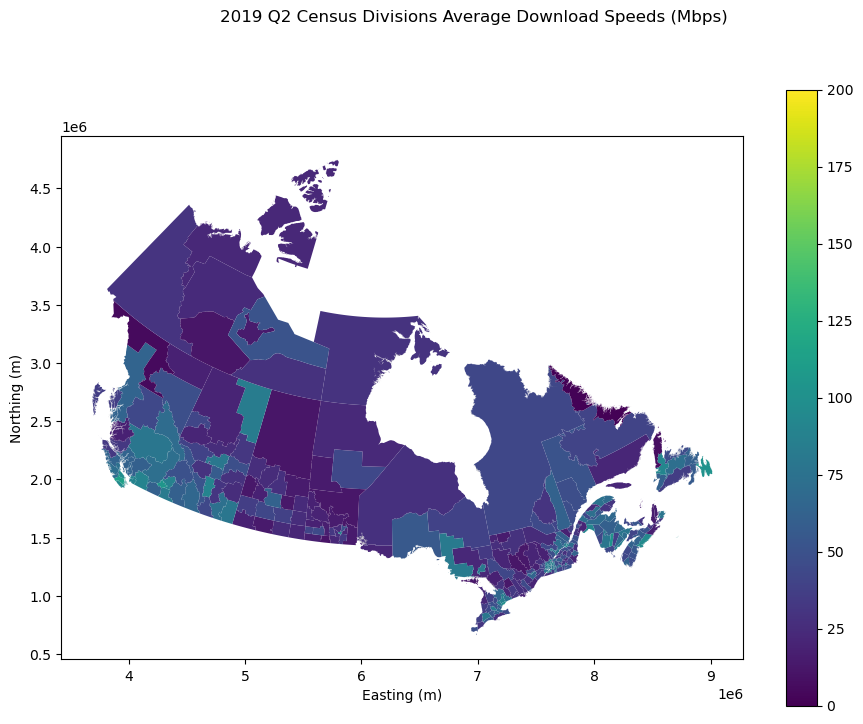

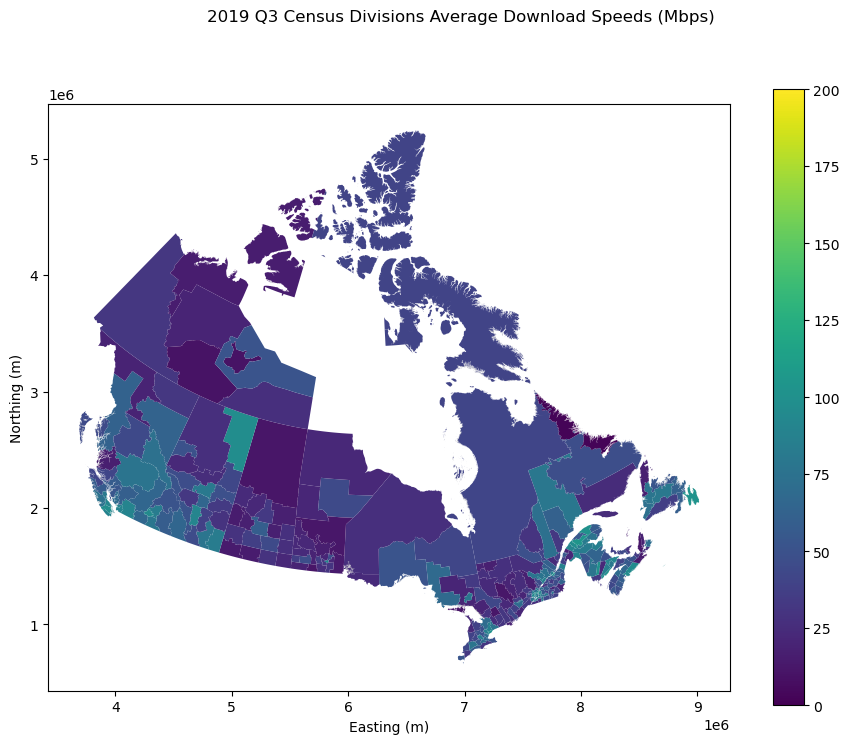

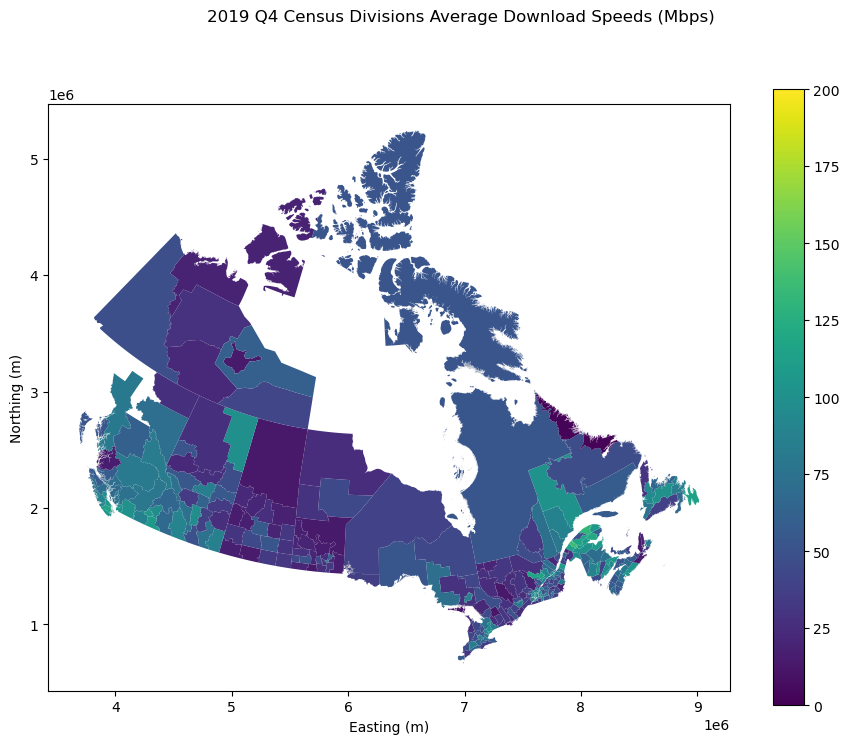

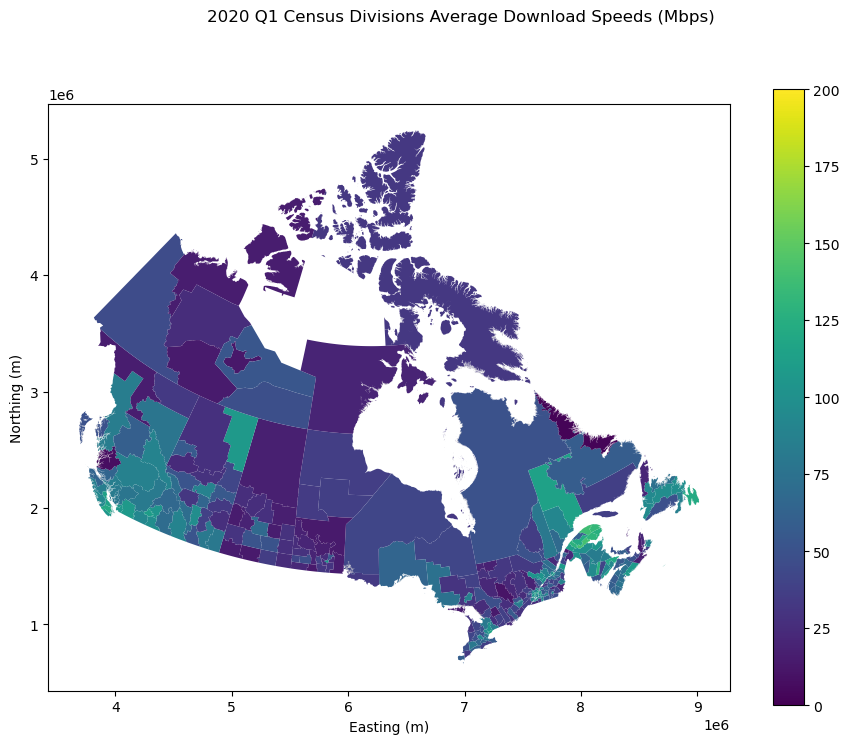

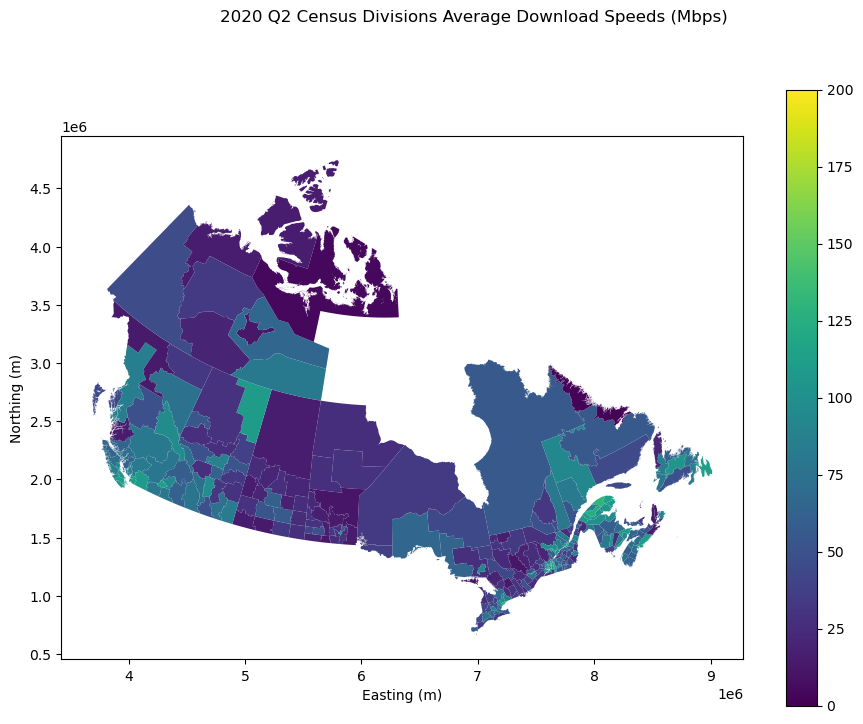

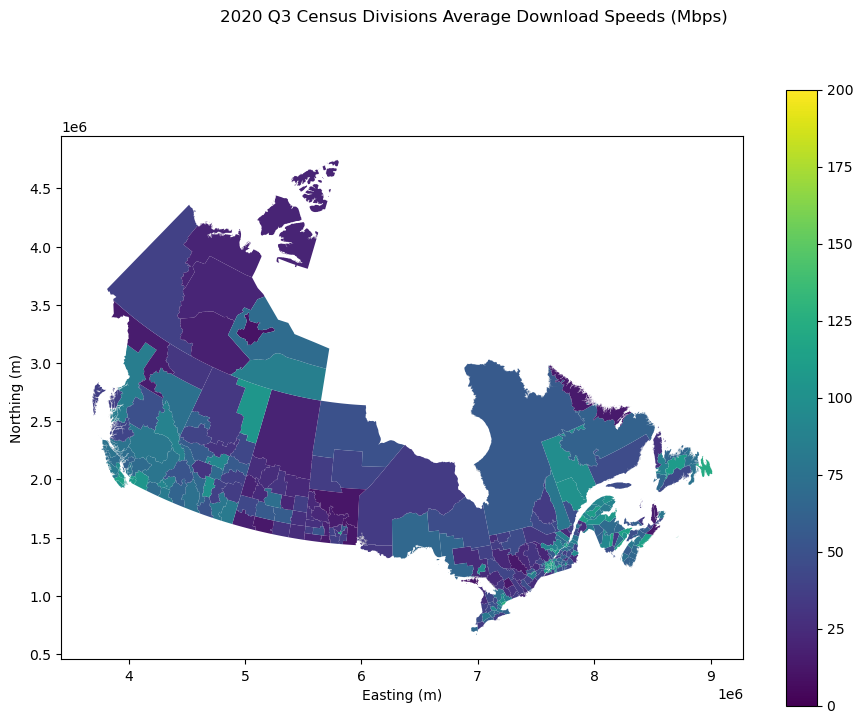

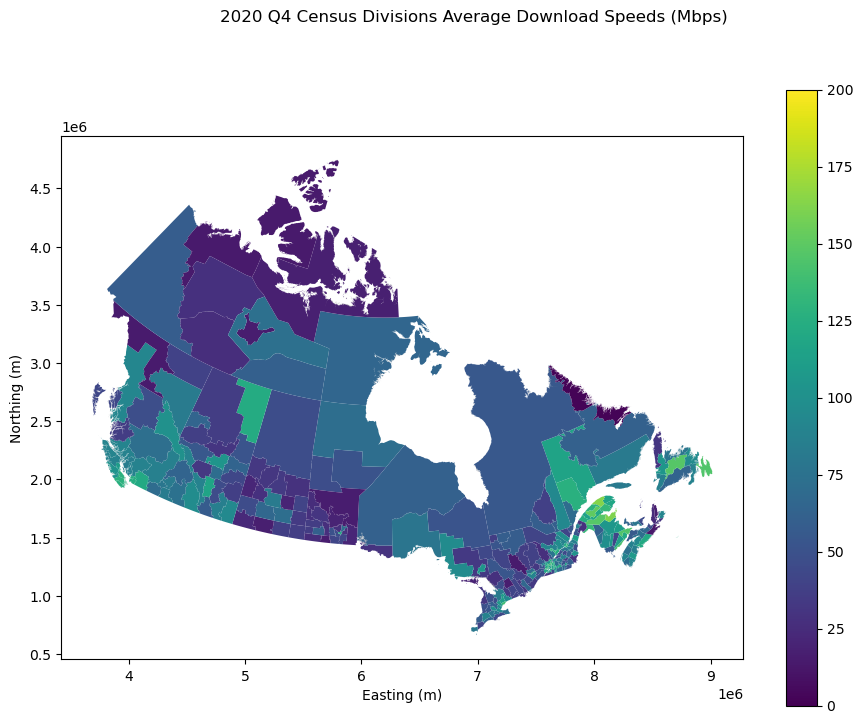

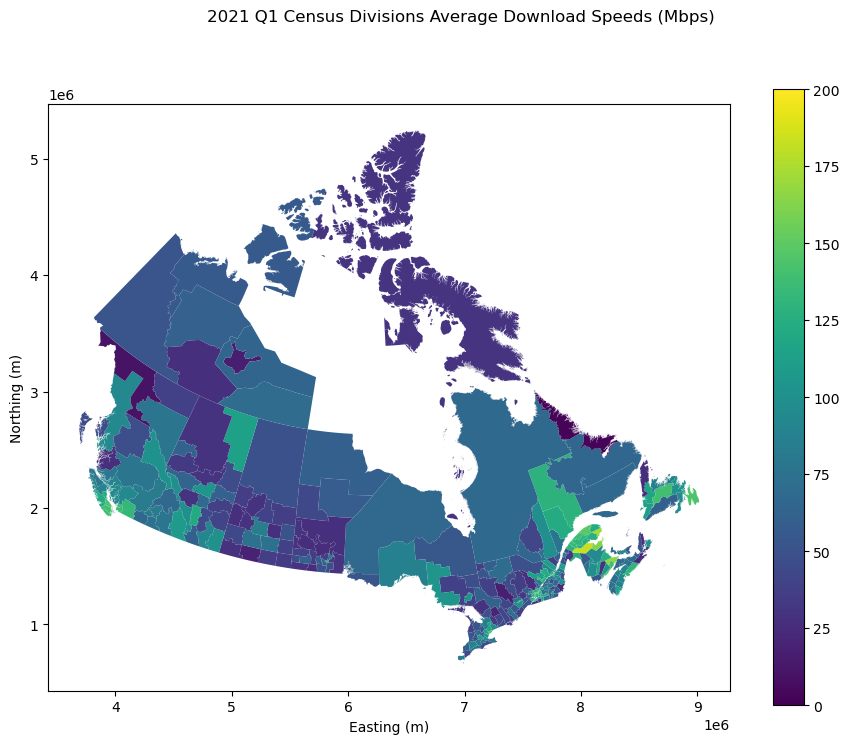

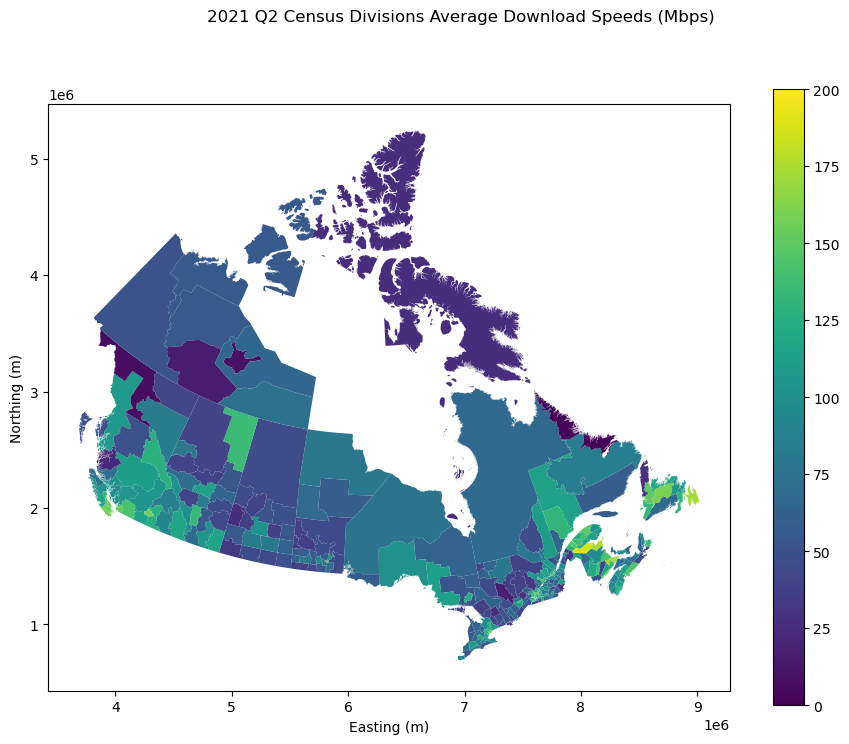

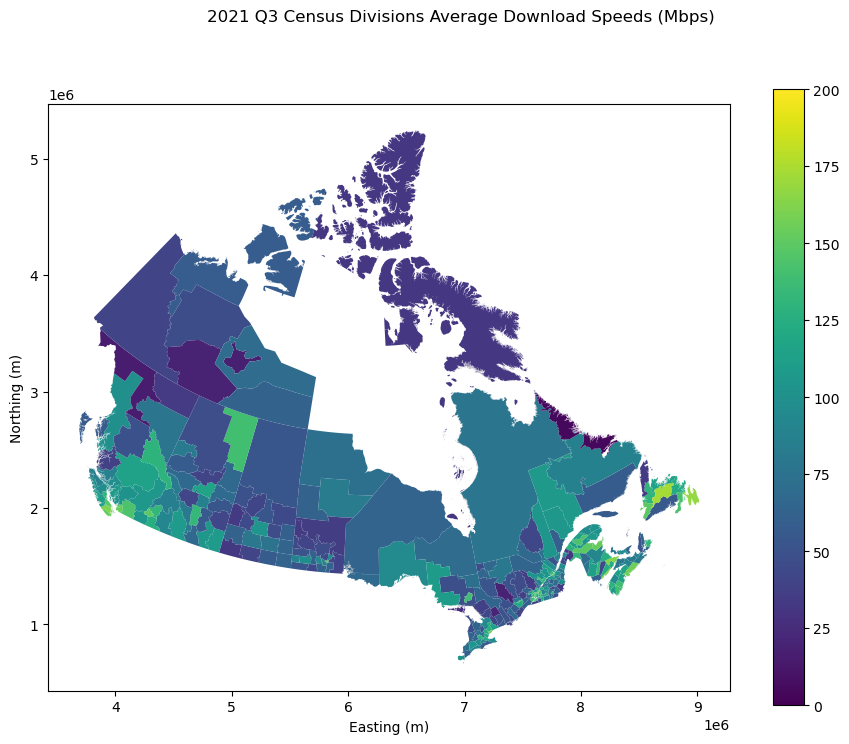

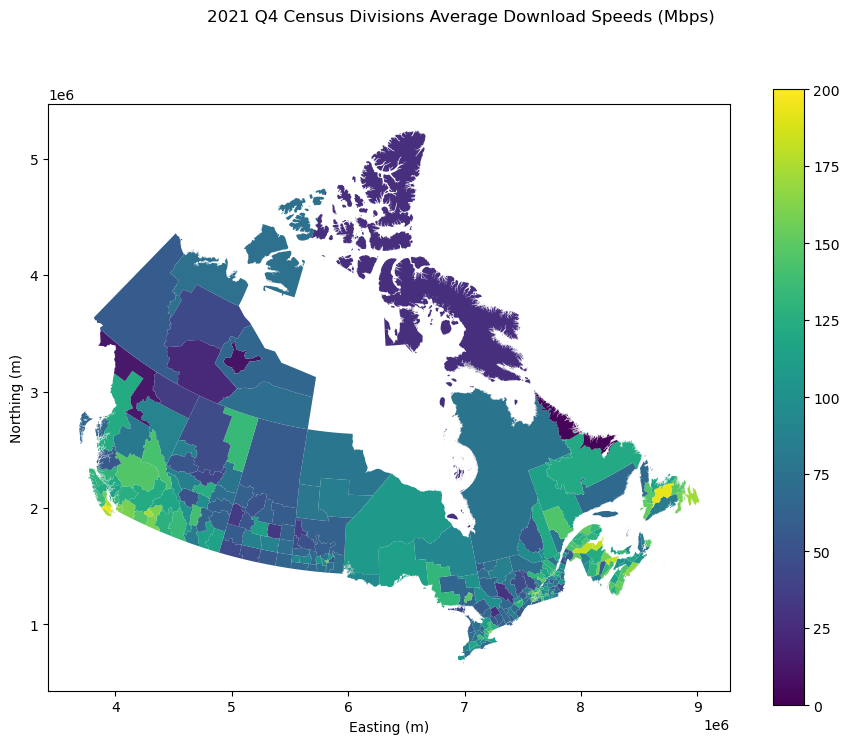

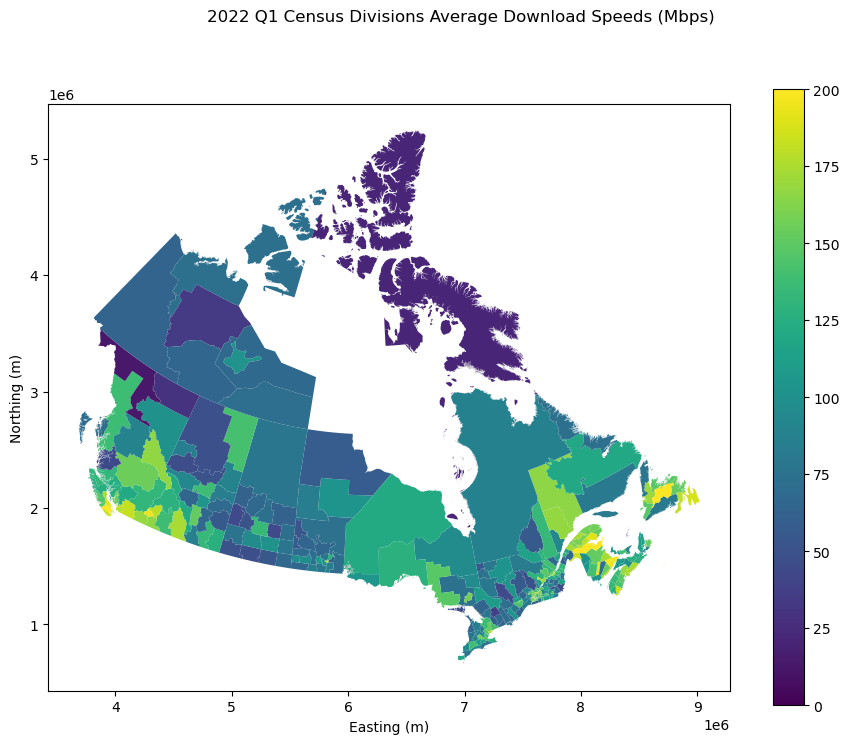

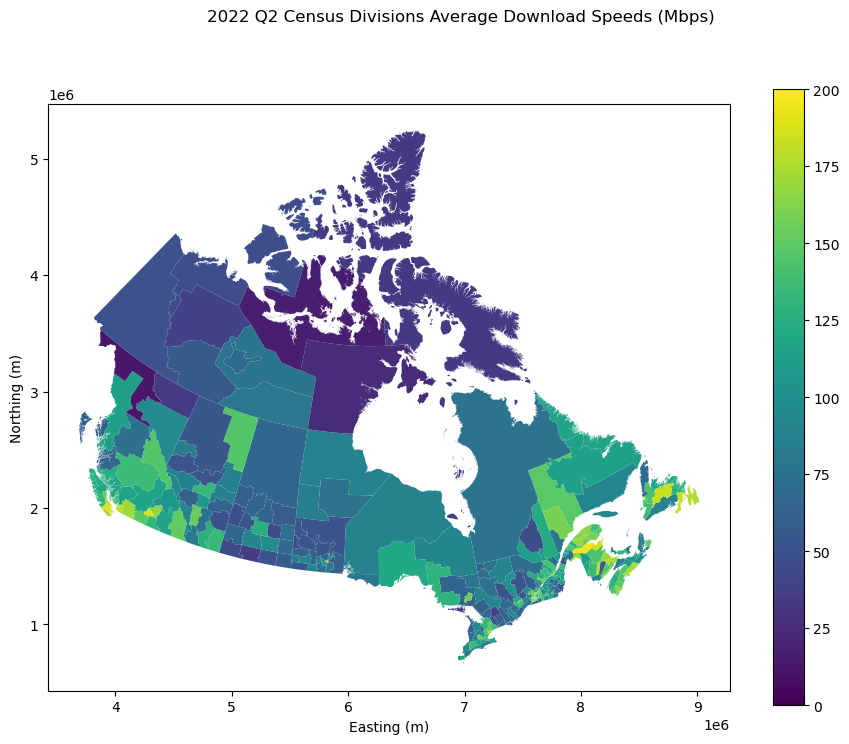

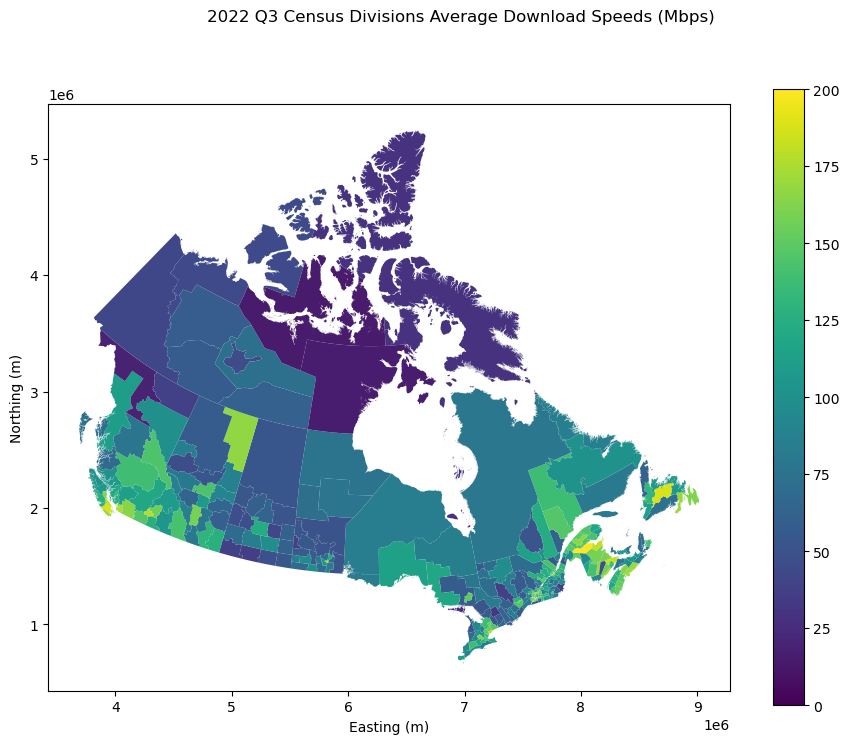

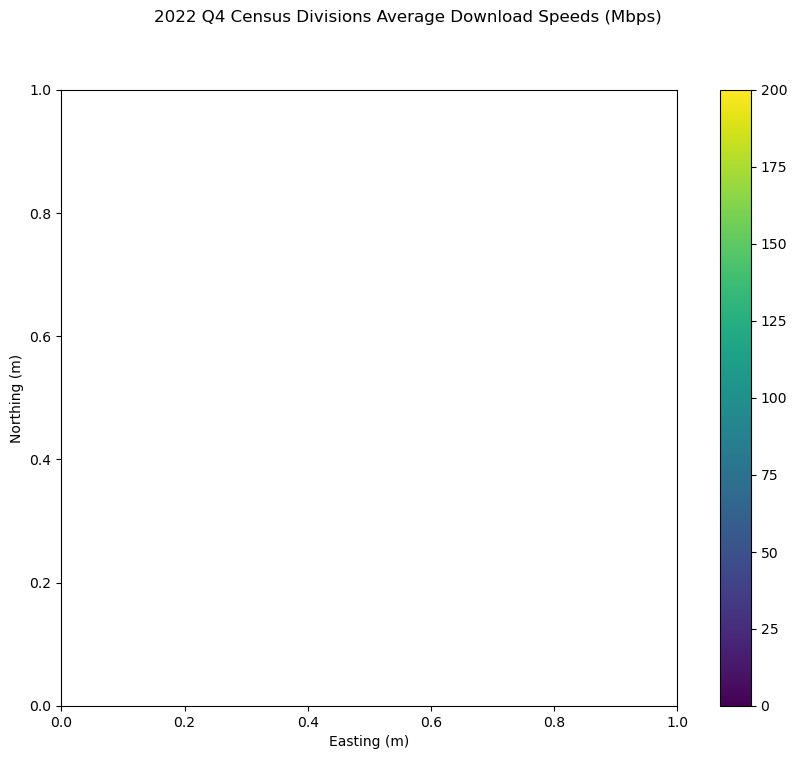

In [38]:
for year in years:
    for quarter in quarters:
        try:
            speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==quarter) & (s.year==year)]
            census_divs_speeds = statcan.boundary('census_divisions').to_crs('epsg:4326').sjoin(speed_tiles, how='left')
            divs_pops = statcan.census_divisions_populations()
            divs_pops.DAPOP = pd.to_numeric(divs_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
            census_speeds_agg = (census_divs_speeds.groupby('CDUID')['avg_d_kbps'].mean()/1000).rename('avg_d_mpbs')
            statcan.boundary('census_divisions').merge(census_speeds_agg, left_on="CDUID", right_index=True).plot(column='avg_d_mpbs', 
                                                                                                                  vmin = 0,
                                                                                                                  vmax = 200,
                                                                                                                  legend=True)
            plt.gcf().suptitle(str(year) + ' Q' + str(quarter) + " Census Divisions Average Download Speeds (Mbps)")
            plt.gca().set(xlabel="Easting (m)", ylabel="Northing (m)")
            plt.savefig(save_dir + '/' + str(year) + '_' + str(quarter) + '_' + 'avg_download_speeds.png')
        except Exception as e:
            continue

## Make Gif

In [43]:
#Generate gif from images

In [44]:
!pip install imageio
import imageio

In [45]:
filenames = []
for year in years:
    for quarter in quarters:
        filenames.append('images_for_gif/' + str(year) + '_' + str(quarter) + '_' + 'avg_download_speeds.png')

In [47]:
images = []
for filename in filenames:
    try:
        images.append(imageio.imread(filename))
    except Exception as e:
        continue
kargs = { 'duration': 1 }
imageio.mimsave('images_for_gif/download_speed_over_time_1sec.gif', images, **kargs)

/tmp/ipykernel_43202/1581664007.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [49]:
images = []
for filename in filenames:
    try:
        images.append(imageio.imread(filename))
    except Exception as e:
        continue
kargs = { 'duration': 2 }
imageio.mimsave('images_for_gif/download_speed_over_time_2sec.gif', images, **kargs)

/tmp/ipykernel_43202/1081979610.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
